In [14]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [16]:
df.shape

(103, 7)

## Data Cleaning

In [17]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.', '')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [18]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [19]:
df.rename(columns= {"Production (Tons)" : 'Production(Tons)'})
df.rename(columns= {"Production per Person (Kg)" : 'Production_per_Person(Kg)'})


,Unnamed: 0,Country,Continent,Production (Tons),Production_per_Person(Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,28386.4
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


In [20]:
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [21]:
df[df['Acreage (Hectare)'].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [22]:
df.dropna()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
97,97,Spain,Europe,394,8,9,43596.5
98,98,Lebanon,Asia,97,16,3,28386.4
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


In [23]:
df.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [24]:
df['Production (Tons)'] = df['Production (Tons)'].astype(float)
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].astype(float)
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].astype(float)
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].astype(float)

In [25]:
df.dtypes

Unnamed: 0                      int64
Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

In [26]:
df.nunique()

Unnamed: 0                    103
Country                       103
Continent                       6
Production (Tons)             103
Production per Person (Kg)    102
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

## How many countrie produces Sugarcane from Each Continent?

In [28]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

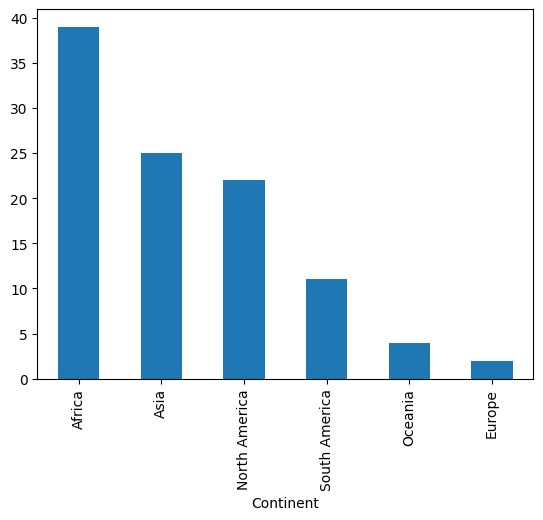

In [29]:
df['Continent'].value_counts().plot(kind='bar')

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_8044\3746753630.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production (Tons)'])
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_8044\3746753630.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production per Person (Kg)'])
C:\Users\

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

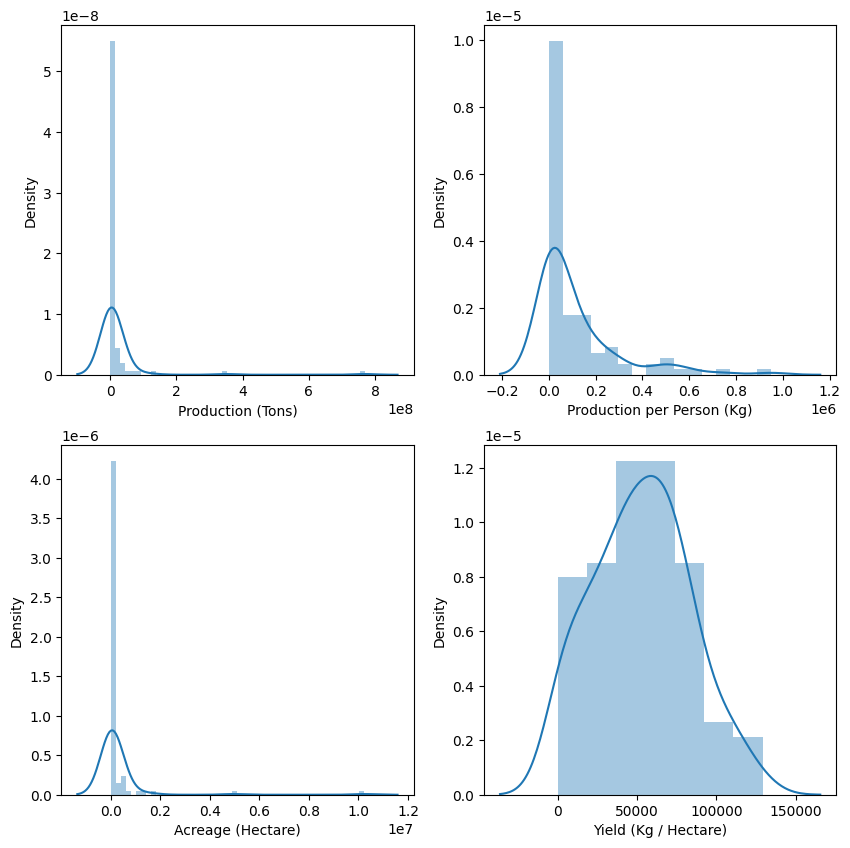

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['Production (Tons)'])

plt.subplot(2,2,2)
sns.distplot(df['Production per Person (Kg)'])

plt.subplot(2,2,3)
sns.distplot(df['Acreage (Hectare)'])

plt.subplot(2,2,4)
sns.distplot(df['Yield (Kg / Hectare)'])

In [32]:
df.describe()

,Unnamed: 0,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,103.000000,1.030000e+02,103.000000,1.020000e+02,102.000000
mean,51.000000,1.832407e+07,111856.305311,2.498981e+05,52628.078431
std,29.877528,8.379760e+07,176134.928689,1.137003e+06,30504.676683
min,0.000000,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,25.500000,4.298850e+04,3364.869000,1.104000e+03,29072.025000
50%,51.000000,1.422432e+06,25481.000000,1.655800e+04,54108.950000
75%,76.500000,6.145648e+06,144004.500000,8.047400e+04,73282.700000
max,102.000000,7.686784e+08,951087.000000,1.022620e+07,129049.300000
